          Feb 2023  Programming Language  Ratings(%)  Change(%)
Feb 2022                                                       
1                1                Python       15.49       0.16
2                2                     C       15.39       1.31
4                3                   C++       13.94       5.93
3                4                  Java       13.21       1.07
5                5                    C#        6.38       1.01
6                6          Visual Basic        4.14      -1.09
7                7            JavaScript        2.52       0.70
10               8                   SQL        2.12       0.58
9                9     Assembly language        1.38      -0.21
8               10                   PHP        1.29      -0.49
11              11                    Go        1.11      -0.12
13              12                     R        1.08      -0.04
14              13                MATLAB        0.99      -0.04
15              14  Delphi/Object Pascal

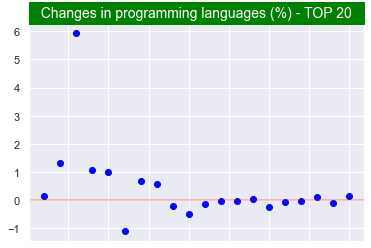

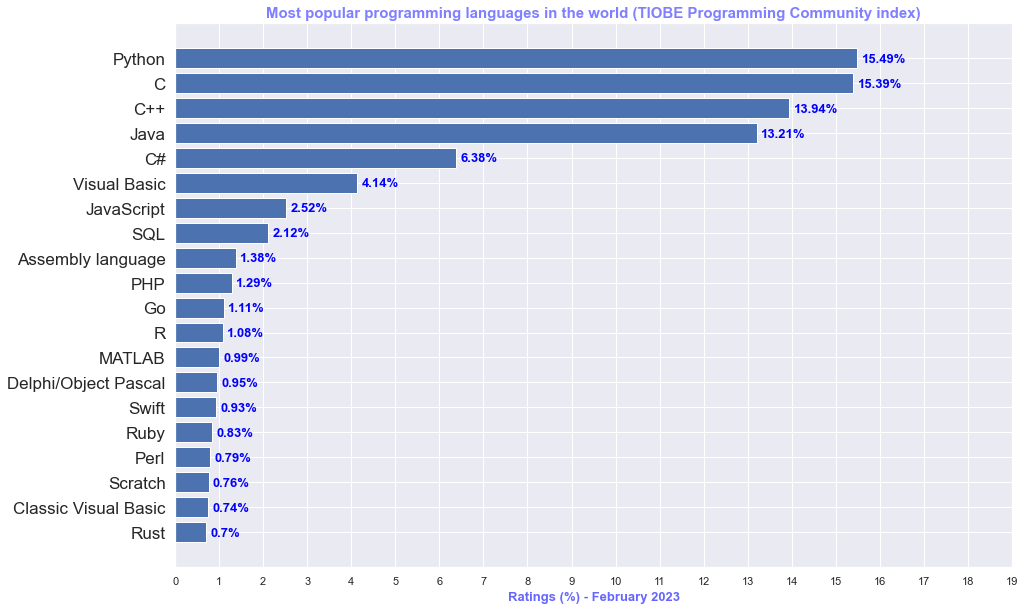

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns


sns.set()

url = "https://www.tiobe.com/tiobe-index/"

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table', {'class': 'table table-striped table-top20'})

df = pd.read_html(str(table))[0]

df['Ratings'] = df['Ratings'].replace({'%':''}, regex=True)
df['Ratings'] = df['Ratings'].astype(float)
df.drop("Change",axis=1,inplace=True)
df.drop("Programming Language",axis=1,inplace=True)
df.rename(columns={"Programming Language.1": "Programming Language",
                  "Change.1": "Change(%)", "Ratings": "Ratings(%)"}, inplace=True)


df.set_index(['Feb 2022'], inplace=True)

df['Change(%)'] = df['Change(%)'].replace({'%':''}, regex=True)
df['Change(%)'] = df['Change(%)'].astype(float)
plt.title("  Changes in programming languages (%) - TOP 20  ",
          fontsize='14',
          backgroundcolor='green',
          color='white')
plt.scatter(df['Feb 2023'], df['Change(%)'], color="blue")
plt.axhline(y=0, xmin=0, xmax=10, color="red", alpha=0.3)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

print(df)
df.dropna()
fig, ax = plt.subplots(figsize=(15, 10))

ax.barh(np.arange(len(df)), df['Ratings(%)'])
for i, v in enumerate(df['Ratings(%)']):
    ax.text(v + 0.1, i + .15, str(v)+'%', color='blue', fontweight='bold', fontsize=13)
ax.set_xticks(np.arange(len(df)))
ax.set_yticks(np.arange(len(df)))
ax.set_yticklabels(df['Programming Language'], fontsize=17)
ax.invert_yaxis()  
ax.set_xlabel('Ratings (%) - February 2023', fontsize=13, color= 'blue', 
              alpha=0.6, fontweight='bold')
ax.set_title('Most popular programming languages in the world (TIOBE Programming Community index)', 
             fontsize=15, color= 'blue', alpha=0.5, fontweight='bold')

plt.show()
 